<a href="https://colab.research.google.com/github/ritwikraha/ml-dataset-reviews/blob/main/notebooks/EDA_Booking_dot_com_rectour_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


In [ ]:
# Booking.com Reviews Dataset EDA

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import numpy as np
import requests
from io import StringIO

In [ ]:
# # Download NLTK stopwords
# nltk.download('stopwords')

# # Load the dataset
# # TODO: NOT WORKING FML!!!!
# dataset = load_dataset("efainman/booking-reviews-dataset")


In [ ]:
# Function to download CSV from Hugging Face
def download_csv_from_hf(repo_id, filename):
    url = f"https://huggingface.co/datasets/{repo_id}/resolve/main/{filename}"
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        print(f"Failed to download {filename}. Status code: {response.status_code}")
        return None

# List of possible file names
file_names = ["train_reviews.csv", "train_users.csv", "train_matches.csv", "train.csv"]

# Try to load available datasets
datasets = {}
for file_name in file_names:
    df = download_csv_from_hf("efainman/booking-reviews-dataset", file_name)
    if df is not None:
        datasets[file_name] = df
        print(f"Successfully loaded {file_name}")

if not datasets:
    raise Exception("No datasets could be loaded. Please check the repository for correct file names.")

Failed to download train_reviews.csv. Status code: 404
Failed to download train_users.csv. Status code: 404
Failed to download train_matches.csv. Status code: 404
Successfully loaded train.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628989 entries, 0 to 1628988
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   review_title               1097128 non-null  object 
 1   review_positive            1628981 non-null  object 
 2   review_negative            1159440 non-null  object 
 3   review_score               1628989 non-null  float64
 4   review_helpful_votes       1628989 non-null  int64  
 5   guest_type                 1628989 non-null  object 
 6   guest_country              1626791 non-null  object 
 7   room_nights                1628989 non-null  int64  
 8   month                      1628989 non-null  int64  
 9   accommodation_id           1628989 non-null  int64  
 10  accommodation_type         1628989 non-null  object 
 11  accommodation_country      1628989 non-null  object 
 12  accommodation_score        1628989 non-null  float64
 13  accommodatio

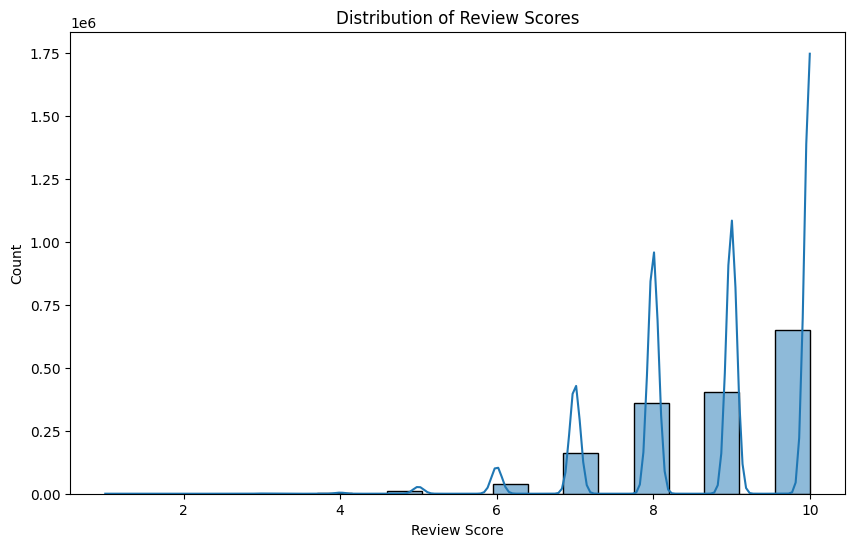

In [ ]:
print(df.info())

# Display the first few rows
print(df.head())

# Basic statistics of numerical columns
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Distribution of review scores
plt.figure(figsize=(10, 6))
sns.histplot(df['review_score'], bins=20, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

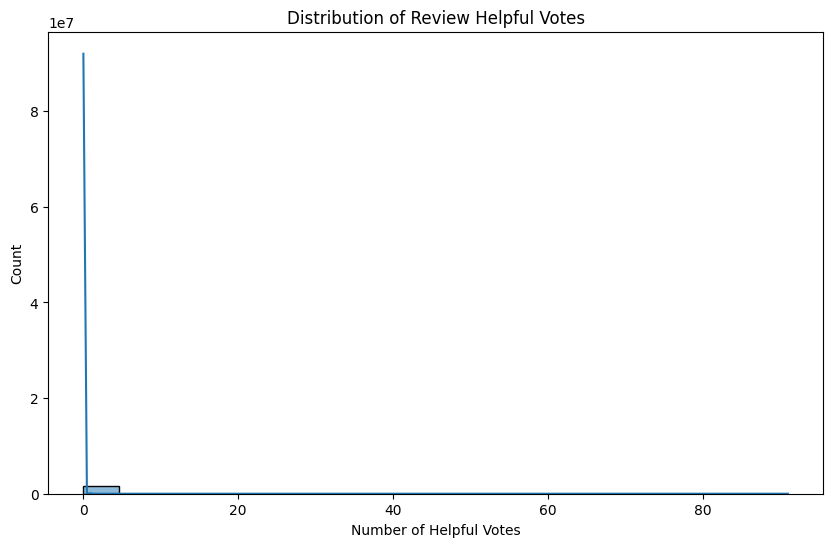

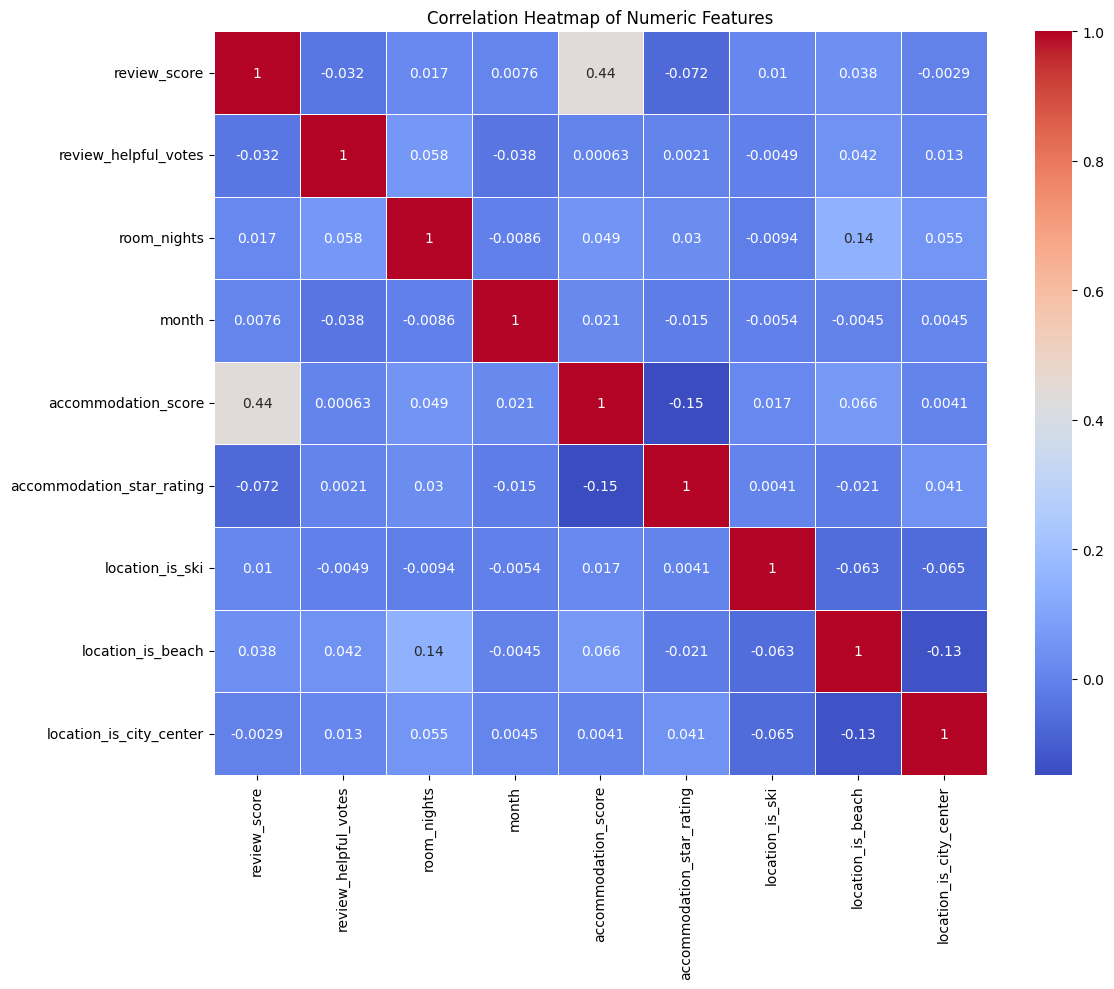

In [ ]:
# Distribution of review helpful votes
plt.figure(figsize=(10, 6))
sns.histplot(df['review_helpful_votes'], bins=20, kde=True)
plt.title('Distribution of Review Helpful Votes')
plt.xlabel('Number of Helpful Votes')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
numeric_cols = ['review_score', 'review_helpful_votes', 'room_nights', 'month',
                'accommodation_score', 'accommodation_star_rating',
                'location_is_ski', 'location_is_beach', 'location_is_city_center']
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


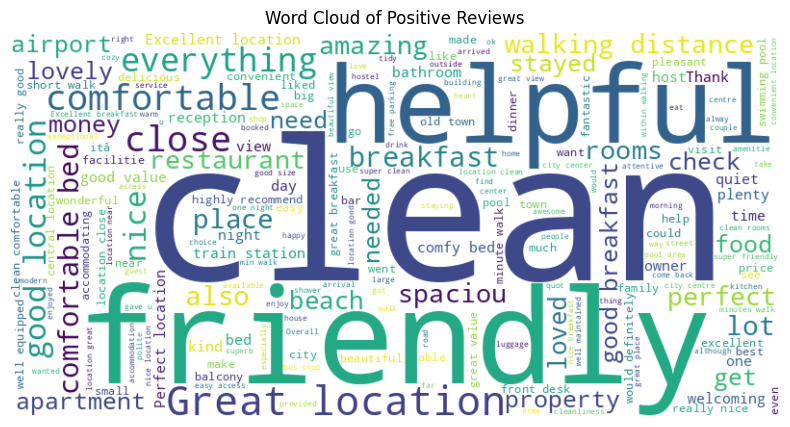

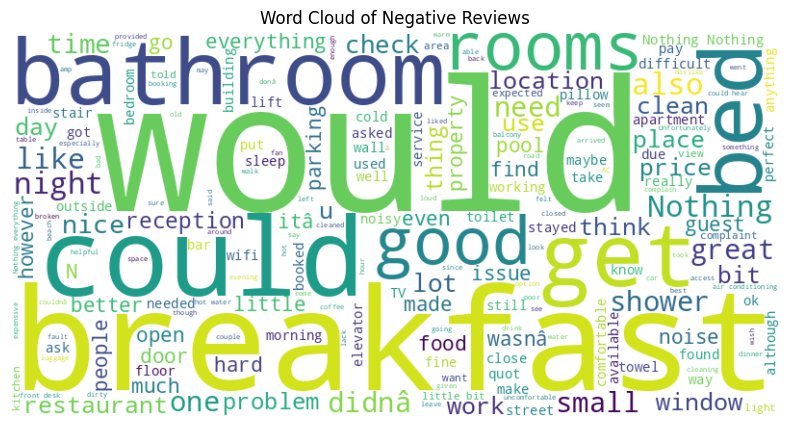

In [ ]:
# Download NLTK stopwords
nltk.download('stopwords')

# Word cloud for positive and negative reviews
def create_wordcloud(text, title):
    stopwords_loader = set(stopwords.words('english'))
    stopwords_loader.update(['hotel', 'room', 'stay', 'staff'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords_loader).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

create_wordcloud(' '.join(df['review_positive'].dropna()), 'Word Cloud of Positive Reviews')
create_wordcloud(' '.join(df['review_negative'].dropna()), 'Word Cloud of Negative Reviews')

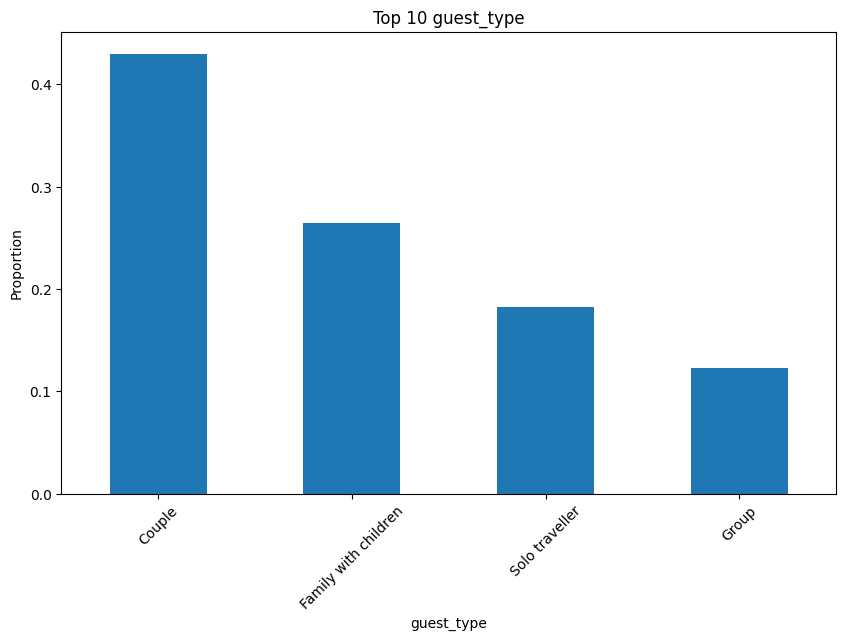

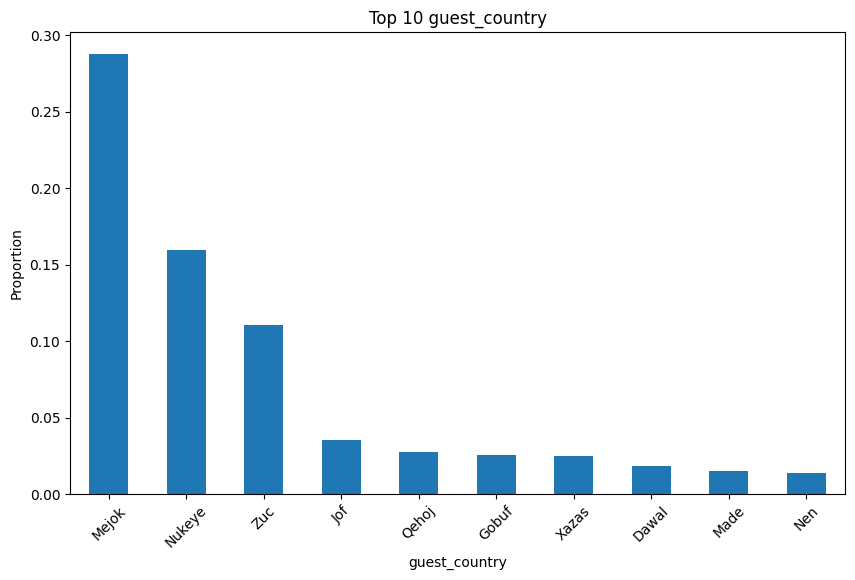

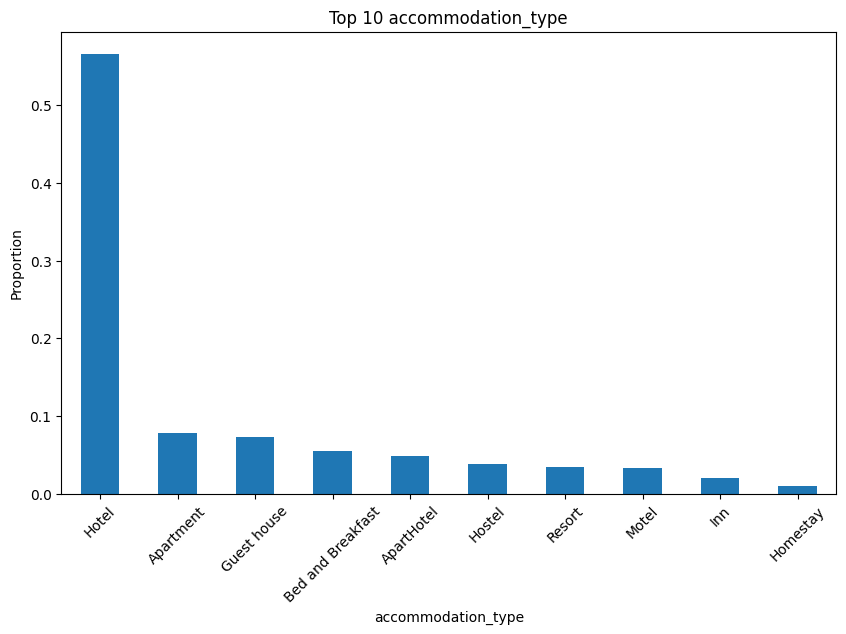

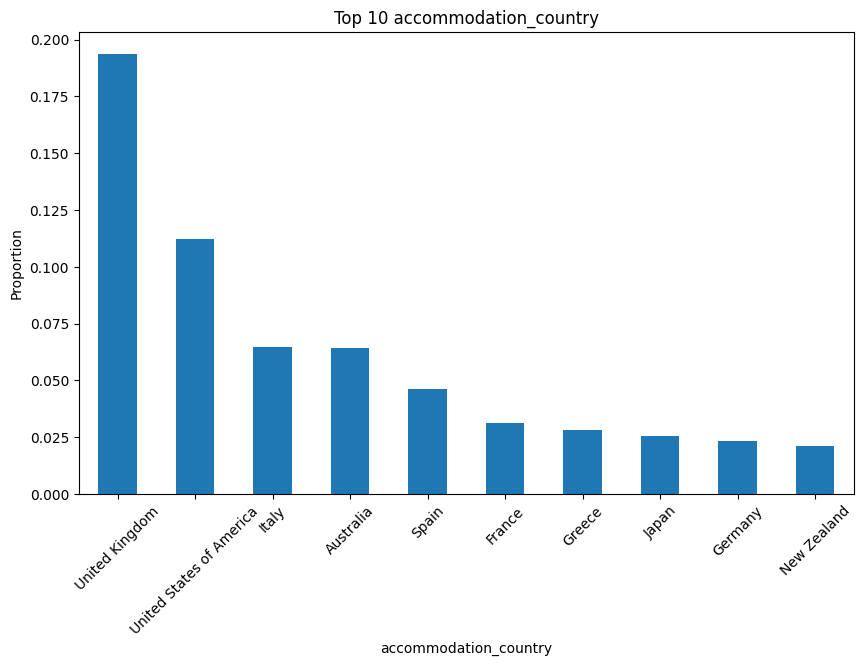

In [ ]:
# Analysis of categorical columns
categorical_cols = ['guest_type', 'guest_country', 'accommodation_type', 'accommodation_country']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    df[col].value_counts(normalize=True).head(10).plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

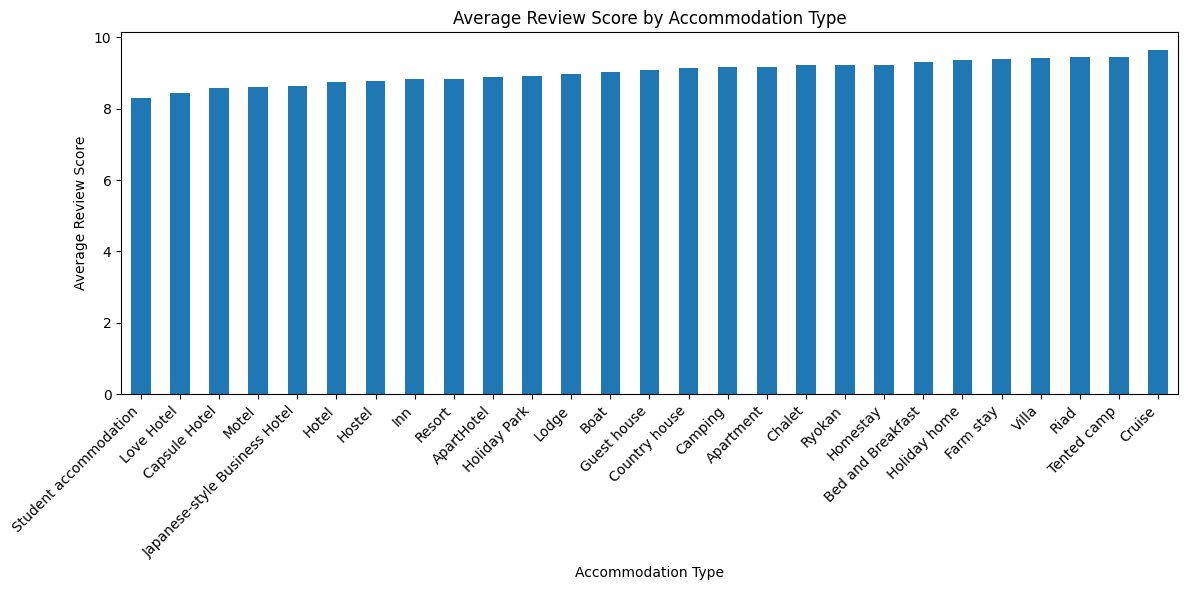

In [ ]:
# Average review score by accommodation type
avg_score_by_type = df.groupby('accommodation_type')['review_score'].mean().sort_values()
plt.figure(figsize=(12, 6))
avg_score_by_type.plot(kind='bar')
plt.title('Average Review Score by Accommodation Type')
plt.xlabel('Accommodation Type')
plt.ylabel('Average Review Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

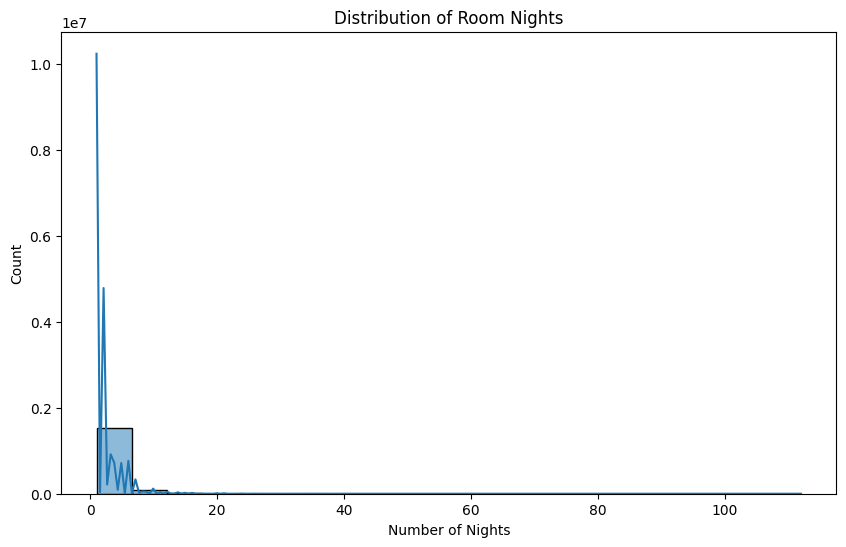

In [ ]:
# Distribution of room nights
plt.figure(figsize=(10, 6))
sns.histplot(df['room_nights'], bins=20, kde=True)
plt.title('Distribution of Room Nights')
plt.xlabel('Number of Nights')
plt.ylabel('Count')
plt.show()

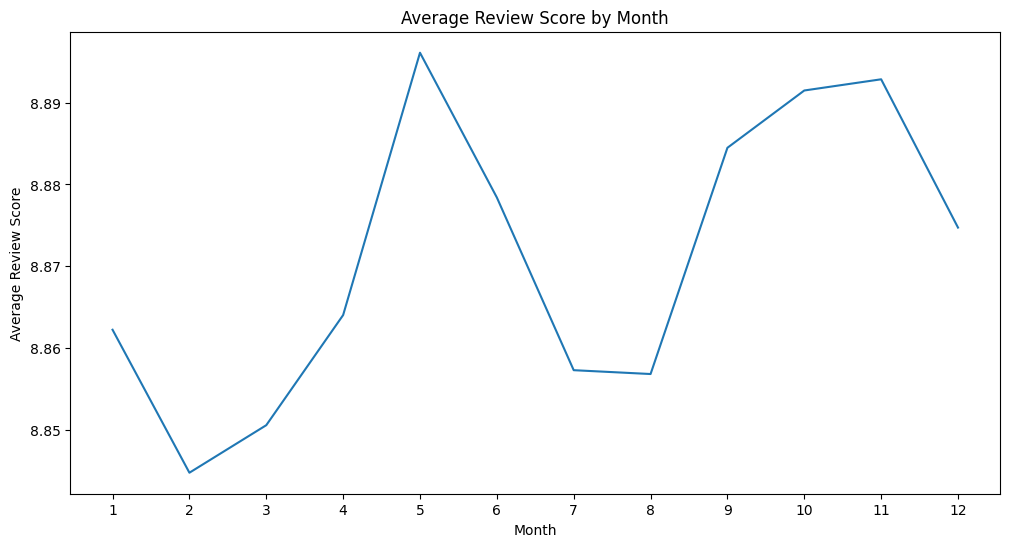

In [ ]:
# Review scores by month
monthly_avg_score = df.groupby('month')['review_score'].mean()
plt.figure(figsize=(12, 6))
monthly_avg_score.plot()
plt.title('Average Review Score by Month')
plt.xlabel('Month')
plt.ylabel('Average Review Score')
plt.xticks(range(1, 13))
plt.show()

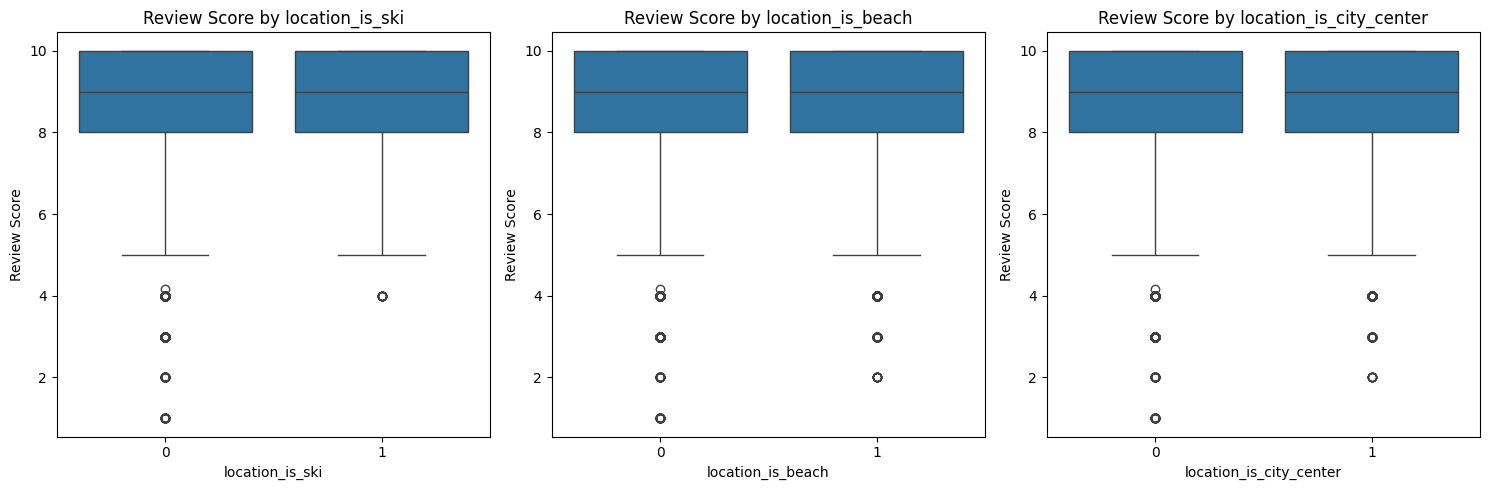

In [ ]:
# Impact of location on review scores
location_features = ['location_is_ski', 'location_is_beach', 'location_is_city_center']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(location_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=feature, y='review_score', data=df)
    plt.title(f'Review Score by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Review Score')
plt.tight_layout()
plt.show()

In [ ]:
# Print some interesting findings
print("Top 5 countries with the highest average review scores:")
print(df.groupby('guest_country')['review_score'].mean().sort_values().head())

print("\nAverage review score by guest type:")
print(df.groupby('guest_type')['review_score'].mean().sort_values())

print("\nCorrelation between accommodation score and review score:")
print(df['accommodation_score'].corr(df['review_score']))

Top 5 countries with the highest average review scores:
guest_country
Roho     8.000000
Selil    8.000000
Kafu     8.035714
Teqi     8.142857
Hef      8.166667
Name: review_score, dtype: float64

Average review score by guest type:
guest_type
Solo traveller          8.790092
Family with children    8.841802
Group                   8.904624
Couple                  8.915120
Name: review_score, dtype: float64

Correlation between accommodation score and review score:
0.44129856629317765
